<a href="https://colab.research.google.com/github/lucianoon/1/blob/main/areasprevisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Gerando dados fictícios
rng = np.random.default_rng(seed=42)               # reprodutibilidade
area = rng.uniform(30, 200, size=200)              # área entre 30 e 200 m²
# Relação quase linear com ruído
price = 3000 * area + rng.normal(0, 20000, size=200)   # preço em reais

# Montando um DataFrame
df = pd.DataFrame({'area_m2': area, 'preco_R$': price})
df.head()

,area_m2,preco_R$
0,161.572528,497584.120657
1,104.609335,305935.901816
2,175.961646,527782.501820
3,148.552565,442388.836850
4,46.010149,144781.938399


from matplotlib import pyplot as plt
_df_0['area_m2'].plot(kind='hist', bins=20, title='area_m2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['preco_R$'].plot(kind='hist', bins=20, title='preco_R$')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='area_m2', y='preco_R$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['area_m2'].plot(kind='line', figsize=(8, 4), title='area_m2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['preco_R$'].plot(kind='line', figsize=(8, 4), title='preco_R$')
plt.gca().spines[['top', 'right']].set_visible(False)

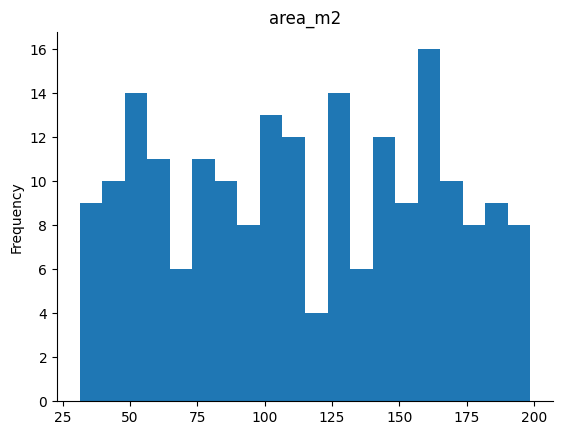

In [10]:
# @title area_m2

from matplotlib import pyplot as plt
df['area_m2'].plot(kind='hist', bins=20, title='area_m2')
plt.gca().spines[['top', 'right',]].set_visible(False)

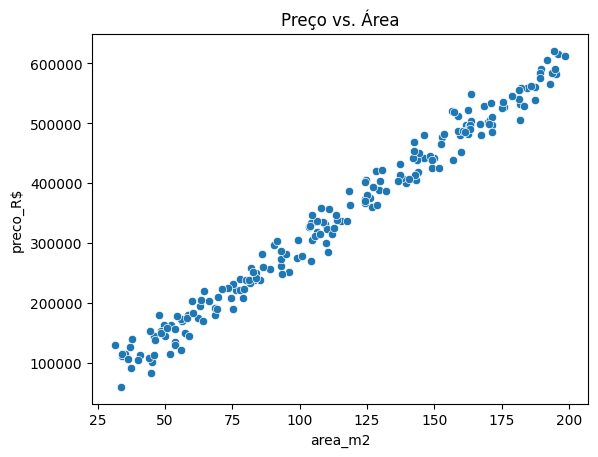

          area_m2       preco_R$
count  200.000000     200.000000
mean   113.957824  342201.567105
std     47.992969  149049.982374
min     31.251586   59757.395203
25%     72.876798  208976.153570
50%    111.430711  336342.530965
75%    157.031516  480752.619229
max    198.703846  620966.855767


In [4]:
# Visualizar a relação entre área e preço
sns.scatterplot(data=df, x='area_m2', y='preco_R$')
plt.title('Preço vs. Área')
plt.show()

# Estatísticas descritivas
print(df.describe())

In [5]:
X = df[['area_m2']]          # variável independente (precisa ser 2‑D)
y = df['preco_R$']           # variável dependente

# 80% treino, 20% teste; fixando o random_state para reproducibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Tamanho treino: {X_train.shape[0]}')
print(f'Tamanho teste : {X_test.shape[0]}')

Tamanho treino: 160
Tamanho teste : 40


In [6]:
# Instancia o modelo
modelo = LinearRegression()

# Ajusta (fit) o modelo nos dados de treino
modelo.fit(X_train, y_train)

# Coeficientes aprendidos
print(f'Coeficiente (slope): {modelo.coef_[0]:.2f}')
print(f'Intercepto (bias)  : {modelo.intercept_:.2f}')

Coeficiente (slope): 3080.37
Intercepto (bias)  : -10244.14


In [7]:
# Predição nos conjuntos de treino e teste
y_pred_train = modelo.predict(X_train)
y_pred_test  = modelo.predict(X_test)

# Funções de métrica
def relatorio(y_true, y_pred, conjunto='Teste'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'--- {conjunto} ---')
    print(f'MAE  : {mae:,.2f}')
    print(f'MSE  : {mse:,.2f}')
    print(f'RMSE : {rmse:,.2f}')
    print(f'R²   : {r2:.4f}\n')

relatorio(y_train, y_pred_train, 'Treino')
relatorio(y_test,  y_pred_test,  'Teste')

--- Treino ---
MAE  : 15,958.94
MSE  : 397,380,166.93
RMSE : 19,934.40
R²   : 0.9827

--- Teste ---
MAE  : 16,009.07
MSE  : 412,183,895.35
RMSE : 20,302.31
R²   : 0.9779



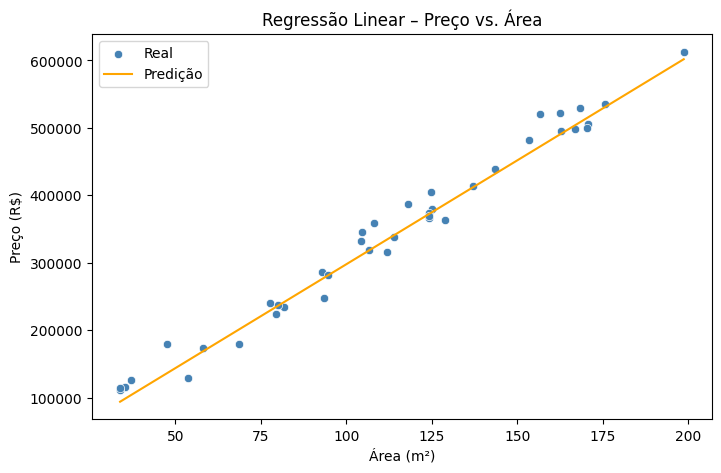

In [8]:
plt.figure(figsize=(8,5))
# Dados reais de teste
sns.scatterplot(x=X_test['area_m2'], y=y_test, label='Real', color='steelblue')
# Linha de predição (modelo)
sns.lineplot(x=X_test['area_m2'], y=y_pred_test, label='Predição', color='orange')
plt.title('Regressão Linear – Preço vs. Área')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()

In [9]:
# Exemplo: prever o preço de uma casa com 120 m²
area_nova = np.array([[120]])        # 2-D (mesmo formato que X)
preco_estimado = modelo.predict(area_nova)[0]
print(f'Preço estimado para 120 m²: R$ {preco_estimado:,.2f}')

Preço estimado para 120 m²: R$ 359,399.68


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
